In [1]:
!pip install pytesseract

In [2]:
!pip install opencv-python

In [3]:
!pip install pdf2image

In [3]:
pip install PyMuPDF

     --------------------------------------- 11.7/11.7 MB 22.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
!pip show opencv-python

Name: opencv-python
Version: 4.7.0.68
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: MIT
Location: c:\users\amrut\anaconda3\lib\site-packages
Requires: numpy, numpy, numpy
Required-by: 


In [52]:
#load libraries
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pdf2image import convert_from_path  #to convert image from pdf to jpg
import csv
import pytesseract
import io

In [2]:
#input for file path
file_path= input('File Path')

File PathC:\Users\amrut\Desktop\itech\Assignment_Without Annotation1.pdf


In [3]:
# Store Pdf with convert_from_path function
images = convert_from_path(file_path)
count = 0
for image in images:
     count +=1
     image.save('file-'+str(count)+'.jpg', 'JPEG')

In [4]:
# Read the JPG image
cad = cv2.imread("file-1.jpg")

In [5]:
cad.shape

(2200, 3400, 3)

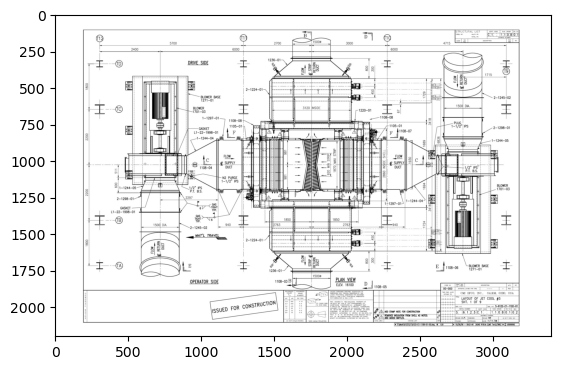

In [6]:
#plot the image
plt.imshow(cad)

In [7]:
# crop the image to its 4th quadrant
height, width, channels = cad.shape
half_height = height//2
half_width = width//2
bottom_right_section = cad[half_height:, half_width:]
cv2.imwrite('cad_22.jpg', bottom_right_section)

True

In [8]:
# Read the JPG image
cad_22 =cv2.imread('cad_22.jpg')

In [9]:
#check the shape of the image
cad_22.shape

(1100, 1700, 3)

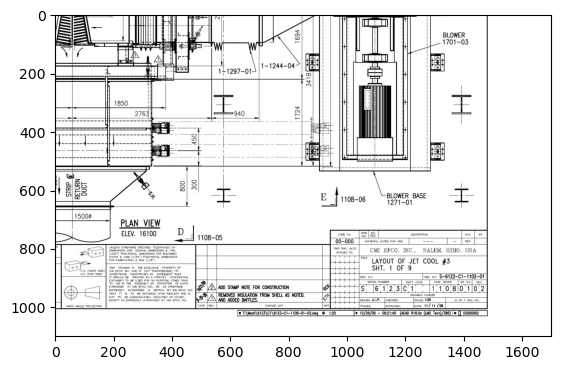

In [10]:
#plot the image
plt.imshow(cad_22)
plt.show()

In [11]:
# crop the image furtur into its 4th quadrant
height, width, channels = cad_22.shape
half_height = height//2
half_width = width//2
bottom_right_section = cad_22[half_height:, half_width:]
cv2.imwrite('cad_44.jpg', bottom_right_section)

True

In [12]:
# Read the JPG image
cad_44 =cv2.imread('cad_44.jpg',0)

In [13]:
#check the shape of the image
cad_44.shape

(550, 850)

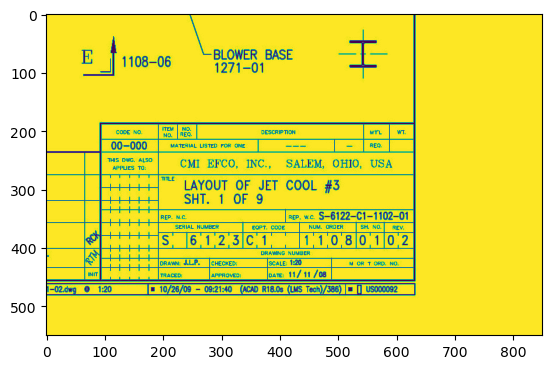

In [15]:
#plot the image
plt.imshow(cad_44)
plt.show()

In [16]:
#thresholding the image to a binary image
thresh,img_bin = cv2.threshold(cad_44,50,255,cv2.THRESH_BINARY |cv2.THRESH_OTSU)

In [17]:
#inverting the image 
img_bin = 255-img_bin
cv2.imwrite('cv_inverted.png',img_bin)

True

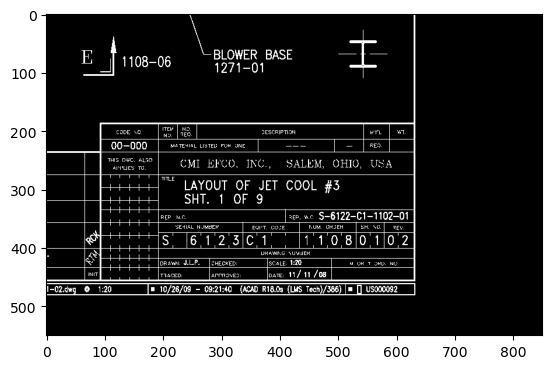

In [18]:
#Plot the output image 
plt.imshow(img_bin,cmap='gray')
plt.show()

In [19]:
pytesseract.pytesseract.tesseract_cmd=r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [20]:
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

In [21]:
# countcol(width) of kernel as 100th of total width
kernel_len = np.array(cad_44).shape[1]//100

In [22]:
# Defining a vertical kernel to detect all vertical lines of image 
ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))

In [23]:
# Defining a horizontal kernel to detect all horizontal lines of image
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 1))

In [24]:
# A kernel of 2x2
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

In [25]:
#Use vertical kernel to detect and save the vertical lines in a jpg
image_1 = cv2.erode(img_bin, ver_kernel, iterations=3)
vertical_lines = cv2.dilate(image_1, ver_kernel, iterations=3)
cv2.imwrite("vertical.jpg",vertical_lines)

True

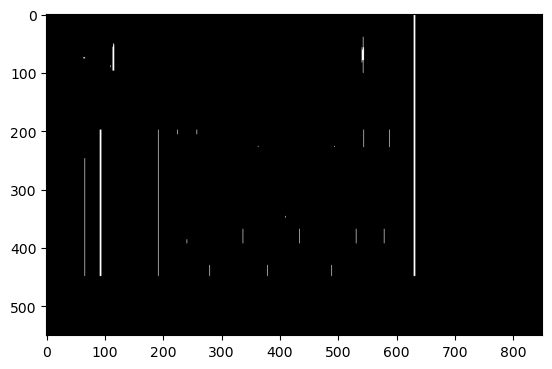

In [26]:
#Plot the generated image
plt.imshow(image_1,cmap='gray')
plt.show()

In [27]:
#Use horizontal kernel to detect and save the horizontal lines in a jpg
image_2 = cv2.erode(img_bin, hor_kernel, iterations=3)
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=3)
cv2.imwrite("horizontal.jpg",horizontal_lines)

True

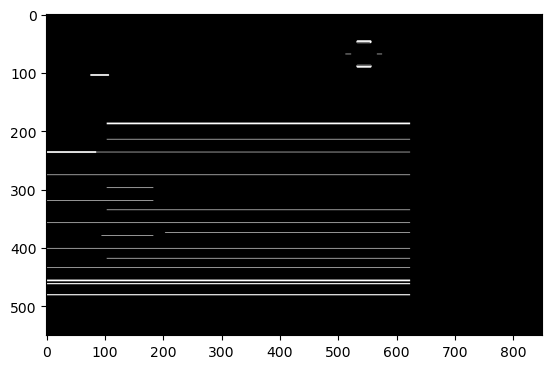

In [28]:
#Plot the generated image
plt.imshow(image_2,cmap='gray')
plt.show()

In [29]:
# Combine horizontal and vertical lines in a new third image, with both having same weight.
img_vh = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)

In [30]:
#Eroding and thesholding the image
img_vh = cv2.erode(~img_vh, kernel, iterations=2)
thresh, img_vh = cv2.threshold(img_vh,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2.imwrite("img_vh.jpg", img_vh)
bitxor = cv2.bitwise_xor(cad_44,img_vh)
bitnot = cv2.bitwise_not(bitxor)

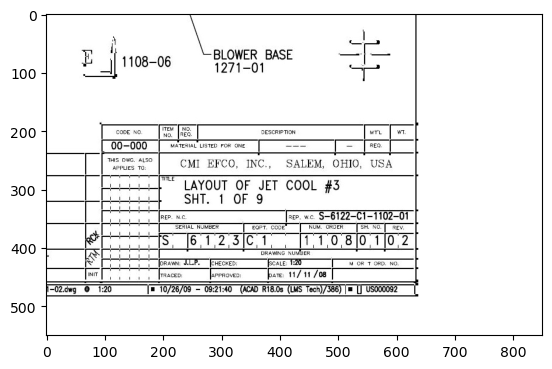

In [31]:
#Plot the output image
plt.imshow(bitnot,cmap='gray')
plt.show()

In [32]:
# Detect contours for following box detection
contours, hierarchy = cv2.findContours(img_vh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [33]:
def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0
    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [34]:
# Sort all the contours by top to bottom.
contours, boundingBoxes = sort_contours(contours, method="top-to-bottom")

In [35]:
#Creating a list of heights for all detected boxes
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]

In [36]:
#Get mean of heights
mean = np.mean(heights)

In [37]:
#Create list box to store all boxes in  
box = []

In [38]:
# Get position (x,y), width and height for every contour and show the contour on image
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if (w<1000 and h<500):
        image = cv2.rectangle(cad_44,(x,y),(x+w,y+h),(0,255,0),2)
        box.append([x,y,w,h])

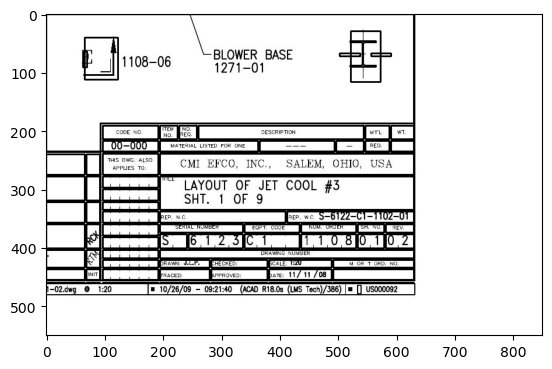

In [39]:
#plot the image with bounding boxes
plt.imshow(image,cmap='gray')
plt.show()

In [40]:
#Creating two lists to define row and column in which cell is located
row=[]
column=[]
j=0

In [41]:
#Sorting the boxes to their respective row and column
for i in range(len(box)):    
        
    if(i==0):
        column.append(box[i])
        previous=box[i]    
    
    else:
        if(box[i][1]<=previous[1]+mean/2):
            column.append(box[i])
            previous=box[i]            
            
            if(i==len(box)-1):
                row.append(column)        
            
        else:
            row.append(column)
            column=[]
            previous = box[i]
            column.append(box[i])
            
print(column)
print(row)

[[492, 460, 138, 1], [382, 460, 107, 1], [283, 460, 96, 1], [195, 460, 85, 1], [97, 460, 95, 1], [69, 460, 23, 1], [0, 460, 66, 1]]
[[[0, 0, 630, 235]], [[522, 29, 51, 87], [66, 40, 57, 72]], [[63, 64, 7, 27], [557, 67, 34, 5], [503, 67, 35, 5]], [[591, 191, 39, 23], [547, 191, 41, 23], [261, 191, 283, 23], [228, 191, 30, 23], [195, 191, 30, 23], [97, 191, 95, 23]], [[591, 217, 39, 19], [547, 217, 41, 19], [497, 217, 47, 19], [366, 217, 128, 19], [195, 217, 168, 19], [97, 217, 95, 19]], [[195, 239, 435, 36], [97, 239, 95, 36], [69, 240, 23, 35], [0, 240, 66, 35]], [[195, 278, 435, 57], [97, 278, 95, 19], [69, 278, 23, 41], [0, 278, 66, 41]], [[97, 300, 95, 19]], [[97, 322, 95, 13], [69, 322, 23, 35], [0, 322, 66, 35], [413, 338, 217, 19], [195, 338, 215, 19], [97, 338, 95, 19]], [[582, 360, 48, 14], [534, 360, 45, 14], [437, 360, 94, 14], [340, 360, 94, 14], [195, 360, 142, 14], [97, 360, 95, 19], [69, 360, 23, 41], [0, 360, 66, 41]], [[582, 377, 48, 24], [534, 377, 45, 24], [437, 377,

In [42]:
#calculating maximum number of cells
countcol = 0
for i in range(len(row)):
    countcol = len(row[i])
    if countcol > countcol:
        countcol = countcol

In [43]:
#Retrieving the center of each column
center = [int(row[i][j][0]+row[i][j][2]/2) for j in range(len(row[i])) if row[0]]

In [44]:
center=np.array(center)
center.sort()
print(center)

[ 33  80 144 237 331 435 561]


In [45]:
#Regarding the distance to the columns center, the boxes are arranged in respective order

finalboxes = []
for i in range(len(row)):
    lis=[]
    for k in range(countcol):
        lis.append([])
    for j in range(len(row[i])):
        diff = abs(center-(row[i][j][0]+row[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        lis[indexing].append(row[i][j])
    finalboxes.append(lis)

In [46]:
#from every single image-based cell/box the strings are extracted via pytesseract and stored in a list
outer=[]
for i in range(len(finalboxes)):
    for j in range(len(finalboxes[i])):
        inner=''
        if(len(finalboxes[i][j])==0):
            outer.append(' ')
        else:
            for k in range(len(finalboxes[i][j])):
                y,x,w,h = finalboxes[i][j][k][0],finalboxes[i][j][k][1], finalboxes[i][j][k][2],finalboxes[i][j][k][3]
                finalimg = bitnot[x:x+h, y:y+w]
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                border = cv2.copyMakeBorder(finalimg,2,2,2,2, cv2.BORDER_CONSTANT,value=[255,255])
                resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                dilation = cv2.dilate(resizing, kernel,iterations=1)
                erosion = cv2.erode(dilation, kernel,iterations=2)
                
                out = pytesseract.image_to_string(erosion)
                if(len(out)==0):
                    out = pytesseract.image_to_string(erosion, config='--psm 3')
                inner = inner +" "+ out
            outer.append(inner)


In [47]:
#Creating a dataframe of the generated OCR list
arr = np.array(outer)
dataframe = pd.DataFrame(arr.reshape(len(row), countcol))
print(dataframe)
data = dataframe.style.set_properties(align="left")
#Converting it in a excel-file
data.to_excel(r"C:\\Users\\amrut\\Desktop\\Final.xlsx")

    0        1                                                  2  \
0                \ =.\nBLOWER BASE a Pas\nE | 1108-06 1271-01 ...   
1                                                                   
2                                                                   
3                                                      CODE NO.\n   
4                                                      _ 00-000\n   
5                                    THIS DWG. ALSO\nAPPUES TO:\n   
6                                                                   
7                                                                   
8                                                                   
9                                                                   
10                                                                  
11        iy\n                                                      
12      INIT\n                                                      
13                                

In [48]:
cad_df = pd.read_excel('Final.xlsx')

In [49]:
cad_df

,Unnamed: 0,0,1,2,3,4,5,6
0,0,,,\ =.\nBLOWER BASE a Pas\nE | 1108-06 1271-01 ...,,,,
1,1,,,,,,,
2,2,,,,,,,
3,3,,,CODE NO.\n,NO.\nREQ.\n ITEM\n,CESCRIPTION\n,,MTL\n
4,4,,,_ 00-000\n,MATERIAL LISTED FOR ONE\n,,,REQ.\n
5,5,,,THIS DWG. ALSO\nAPPUES TO:\n,,"CMI EFCO, INC., SALEM, OHIO, USA\n",,
6,6,,,,,TILE\n\nLAYOUT OF JET COOL #3\nSHT. 1 OF 9\n,,
7,7,,,,,,,
8,8,,,,REP. N.C.\n,,sep. wc. S—6122-C1-1102-01\n,
9,9,,,,SERIAL NUMBER\n,EOPT. COCE”\n,NUM. ORSER\n,REY.\n SH. NO.\n


In [50]:
cad_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [53]:
# Read the image
img = cv2.imread('cad_44.jpg')

# Extract the text from the image using PyTesseract
text = pytesseract.image_to_string(img)

# Convert the extracted text into a Pandas DataFrame
df_cad2 = pd.read_fwf(io.StringIO(text))

# Print the DataFrame
print(df_cad2)

                                        _— BASE is ae Unnamed: 1  Unnamed: 2  \
0                              E Jitcs-o6 = BLOWER ae        NaN         NaN   
1                                 CODE NO DESCRIPTION        NaN         NaN   
2                 00-000 MATERIAL LISTED FOR ONE 2s z        NaN         NaN   
3            pepe ae CMI EFCO, INC., SALEM, OHIO, USA        NaN         NaN   
4                             ™ LAYOUT OF JET COOL #3        NaN         NaN   
5                                                 F 9        NaN         NaN   
6                                            SHT. 1 0        NaN         NaN   
7                 REP. NC. sep, wc. $-6122—C1-1102-01        NaN         NaN   
8                               S, [612'3 1'1/0'8/071        NaN         NaN   
9                                              Ea Toa        NaN         NaN   
10               Lreacen: Larrroves: loare: 11/11 /08        NaN         NaN   
11  1=02.dwg_@ 1:20 © 10/26/09 = 09:21:4

In [55]:
df_cad2

,_— BASE is ae,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,E Jitcs-o6 = BLOWER ae,NaN,NaN,NaN,NaN,NaN
1,CODE NO DESCRIPTION,NaN,NaN,NaN,NaN,NaN
2,00-000 MATERIAL LISTED FOR ONE 2s z,NaN,NaN,NaN,NaN,NaN
3,"pepe ae CMI EFCO, INC., SALEM, OHIO, USA",NaN,NaN,NaN,NaN,NaN
4,™ LAYOUT OF JET COOL #3,NaN,NaN,NaN,NaN,NaN
5,F 9,NaN,NaN,NaN,NaN,NaN
6,SHT. 1 0,NaN,NaN,NaN,NaN,NaN
7,"REP. NC. sep, wc. $-6122—C1-1102-01",NaN,NaN,NaN,NaN,NaN
8,"S, [612'3 1'1/0'8/071",NaN,NaN,NaN,NaN,NaN
9,Ea Toa,NaN,NaN,NaN,NaN,NaN


In [51]:
cad_df

,0,1,2,3,4,5,6
0,,,\ =.\nBLOWER BASE a Pas\nE | 1108-06 1271-01 ...,,,,
1,,,,,,,
2,,,,,,,
3,,,CODE NO.\n,NO.\nREQ.\n ITEM\n,CESCRIPTION\n,,MTL\n
4,,,_ 00-000\n,MATERIAL LISTED FOR ONE\n,,,REQ.\n
5,,,THIS DWG. ALSO\nAPPUES TO:\n,,"CMI EFCO, INC., SALEM, OHIO, USA\n",,
6,,,,,TILE\n\nLAYOUT OF JET COOL #3\nSHT. 1 OF 9\n,,
7,,,,,,,
8,,,,REP. N.C.\n,,sep. wc. S—6122-C1-1102-01\n,
9,,,,SERIAL NUMBER\n,EOPT. COCE”\n,NUM. ORSER\n,REY.\n SH. NO.\n


In [57]:
for col in df_cad2:
    print(col)

_— BASE is ae
Unnamed: 1
Unnamed: 2
Unnamed: 3
Unnamed: 4
Unnamed: 5


In [56]:
import json

In [90]:
import json

# Define the data as a Python dictionary
data = {
    "D: Vendor": cad_df.at[5,4][:14],
    "E: Title 1": cad_df.at[6,4][7:28],
    "F: Title 2": cad_df.at[6,4][29:-1],
    "M: Project Number": cad_df.at[8,5][10:-1],
    "O: Sheet": cad_df.at[8,5][-3:-1],
    "R: Revision date": cad_df.at[12,5][-11:-1]
}

# Write the dictionary to a JSON file
with open("data.json", "w") as file:
    json.dump(data, file)


In [89]:
cad_df.at[8,5][10:-1]

'S—6122-C1-1102-01'